## Homework 4 ##

# Name: Hsiao Yu, Hsu #

## Qestion1 ##

In [21]:
def BFS(g,s):
    explored = []
    queue = [s] 
    levels = {}         
    levels[s]= 0    
    visited= [s]     
    parent={}
    # keep looping until there are nodes still to be checked
    while queue:
       # pop shallowest node (first node) from queue
        node = queue.pop(0)
        explored.append(node)
        print(node)
        neighbours = g[node] 
        
        # add neighbours of node to queue, for comparison
        for neighbour in neighbours:
            if neighbour not in visited:
                queue.append(neighbour)
                visited.append(neighbour)
                parent[neighbour]=node
                levels[neighbour]=levels[node]+1 #Levels from the "parent" +1
                
    print(parent)
    print(levels)

In [22]:
graph = {'A': ['B', 'C', 'E'],
         'B': ['A','D', 'E'],
         'C': ['A', 'F', 'G'],
         'D': ['B'],
         'E': ['A', 'B','D'],
         'F': ['C'],
         'G': ['C']}
BFS(graph,'G')

G
C
A
F
B
E
D
{'C': 'G', 'A': 'C', 'F': 'C', 'B': 'A', 'E': 'A', 'D': 'B'}
{'G': 0, 'C': 1, 'A': 2, 'F': 2, 'B': 3, 'E': 3, 'D': 4}


## Question2 ##

In [23]:
def BFS(g,s,unvisited):
    explored = []
    queue = [s]
    levels = {}         
    levels[s]= 0    
    visited= [s]
    parent={}
    while queue:
       # pop shallowest node (first node) from queue
        node = queue.pop(0)
        explored.append(node)
        neighbours = g[node] #'A','D','E'
        
        # add neighbours of node to queue, for comparison
        for neighbour in neighbours:
            if neighbour not in visited:
                queue.append(neighbour)
                visited.append(neighbour)
                unvisited.pop(neighbour) 
                parent[neighbour]=node
                levels[neighbour]=levels[node]+1 #Levels from the "parent" +1

def NumberOfComponents(g):
    unvisited = {}
    unvisited = g.copy()  
    count = 0
    while unvisited: #stop processing the bfs while none in the unvisited
        start= unvisited.popitem()[0]
        #print(start)
        BFS(g,start,unvisited)
        count += 1
    print(count)

In [24]:
graph = {'A': ['B', 'C', 'E'],
         'B': ['A','D', 'E'],
         'C': ['A', 'F'],
         'D': ['B'],
         'E': ['A', 'B','D'],
         'F': ['C'],
         'G': ['H'],
         'H':['G']}
NumberOfComponents(graph)

2


## Question3 ##

In [17]:
def RandomGraph(n, p):
    import networkx as nx
    from itertools import combinations, groupby
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

TypeError: BFS() missing 1 required positional argument: 'unvisited'

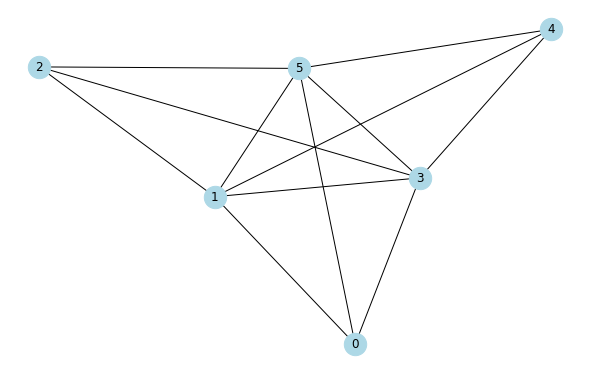

In [20]:
seed = random.randint(1,10)
probability = 0.7
testgraph = RandomGraph(nodes,probability)
testgraph_dict=nx.to_dict_of_dicts(testgraph)
plt.figure(figsize=(8,5))
nx.draw(testgraph, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

#print (testgraph_dict)
BFS(testgraph_dict, 4)
NumberOfComponents(testgraph_dict)


## Question4 ##

procedure BellmanFord(list vertices, list edges, vertex source)  
    
   for each vertex v in vertices:  
       if v is source then distance[v] := 0  
       else distance[v] := infinity  
       predecessor[v] := null  
 
   for i from 1 to size(vertices)-1:  
       for each edge (u, v) with weight w in edges:  
           if distance[u] + w < distance[v]:  
               distance[v] := distance[u] + w  
               predecessor[v] := u  
  
   for each edge (u, v) with weight w in edges:  
       if distance[u] + w < distance[v]:  
           error "Graph contains a negative-weight cycle"
